## The project in on credit card fraud detection

Loading packages

In [7]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# from pandas_profiling import ProfileReport
#from dtreeviz.trees import dtreeviz # remember to load the package

from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn import neighbors
from sklearn import neural_network
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

### Loading dataset

The data used for this project was obtained from the open data source repository: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [11]:
pwd

'/home/jeremiah/Music/music/PROJECTS/faithful/notebook'

In [18]:
dataset = pd.read_csv('/home/jeremiah/Music/music/PROJECTS/faithful/dataset/creditcard.csv')

## Data Understanding and Preparation

In [19]:
# Having a bird's eye view of the data
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
# Shape of the data
dataset.shape

(284807, 31)

Thus, the dataset contains, 53571 credit card transactions and 31 features.

In [21]:
# Describing the dataset using descriptive statistics
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The variables V1 to V28 have all been transformed using Principal Component Analysis (PCA), for confidentiality and privacy reasons.

### Checking for missing values
This exploration shows that variables V3 to V28, Amount and Class all contain 1 missing value each

In [22]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Dealing with missing value

Since the missing value in each of those variables is 1, we will remove it from the dataset as it is negligible. 

In [23]:
dataset.dropna(inplace =True)

In [24]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [25]:
dataset.shape

(284807, 31)

Observing the target class

In [26]:
dataset['Class'].unique()

array([0, 1])

### Exploratory Data Analysis

<AxesSubplot:>

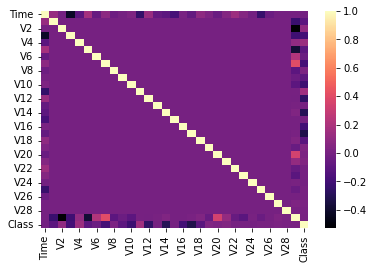

In [27]:
correlation = dataset.corr()
sns.heatmap(correlation, cmap='magma', linecolor='white')

In [28]:
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

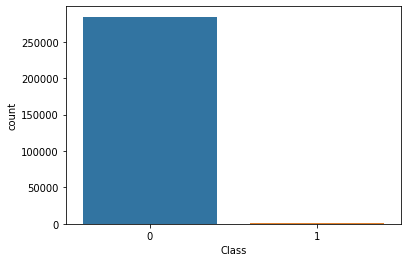

In [29]:
sns.countplot(x='Class', data=dataset)

In [30]:
s = dataset.Class
counts = s.value_counts()
percent = s.value_counts(normalize=True)
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'counts': counts, 'ratio': percent, 'percentage': percent100})

,counts,ratio,percentage
0,284315,0.998273,99.8%
1,492,0.001727,0.2%


The dataset is highly imbalanced. 

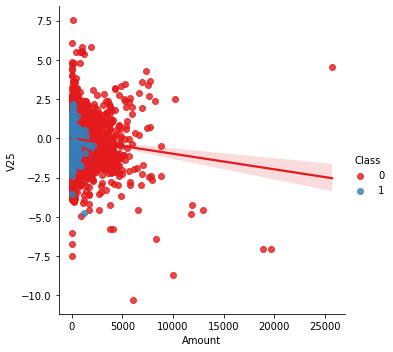

In [31]:
sns.lmplot(x='Amount', y='V25', data= dataset, hue= 'Class', palette= 'Set1')

<AxesSubplot:xlabel='Amount', ylabel='V1'>

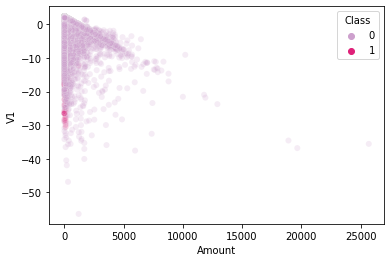

In [32]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x='Amount', y='V1',data= dataset, hue='Class',palette='PuRd', alpha =0.2)

<AxesSubplot:xlabel='Class', ylabel='Amount'>

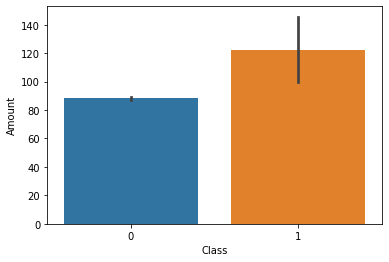

In [33]:
sns.barplot(x='Class',y='Amount',data=dataset)

<AxesSubplot:xlabel='Class', ylabel='Time'>

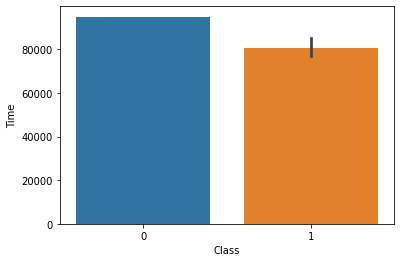

In [34]:
sns.barplot(x='Class',y='Time',data=dataset)

In [35]:
# Mean of the amount
dataset['Amount'].mean()

88.34961925093133

<AxesSubplot:xlabel='Class', ylabel='Time'>

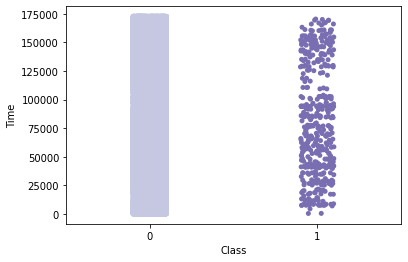

In [36]:
sns.stripplot(x="Class", y="Time", data=dataset , palette= "Purples")

## Modelling and Evaluation

Modelling before resampling

In [37]:
X = dataset.drop(columns='Class')
y = dataset['Class']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)

array([[-1.95144063, -1.16681856, -0.28654908, ...,  0.96676   ,
        -0.4486209 , -0.33974783],
       [ 1.24181171, -0.15922175, -2.43543667, ..., -0.71311931,
         0.33519183,  4.27773998],
       [ 0.05339701, -0.92214029, -0.33881865, ..., -0.15212107,
         0.26753092, -0.0533992 ],
       ...,
       [-0.31497174, -0.07400401,  0.59673261, ..., -0.29672056,
        -0.59571272, -0.32837128],
       [-0.14359433, -1.50291696,  1.41328113, ...,  1.2243654 ,
         1.01984233, -0.33974783],
       [-0.38688453,  0.62962541, -0.46917078, ...,  0.0044092 ,
         0.11724428,  0.09364469]])

A list created for comparing the performance of the algorithms

In [40]:
model_test_accuracy_comparisons = []
model_test_auc_comparisons = []

In [41]:
logistic_1 = linear_model.LogisticRegression(max_iter=2000)
logistic_1.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

Accuracy: 0.9992275552122467
AUC Score 0.8050708634351088
%%%%%%% Classification Report %%%%%%%%%%%
              precision    recall  f1-score   support

   Not_fraud       1.00      1.00      1.00     85307
       Fraud       0.86      0.61      0.72       136

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

%%%%%%% Confusion Matrix %%%%%%%%%%%
Predicted      0   1    All
True                       
0          85294  13  85307
1             53  83    136
All        85347  96  85443
%%%%%%% Confusion Matrix Display%%%%%%%%%%%


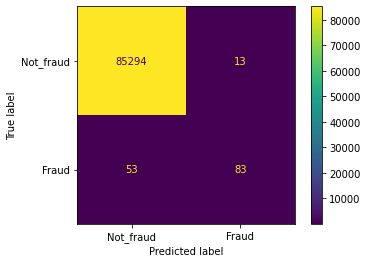

In [42]:
# Make a set of predictions for the test data
y_pred = logistic_1.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy: " +  str(accuracy))

# auc scores
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score", auc_score)

# Classification table
print('%%%%%%% Classification Report %%%%%%%%%%%')
target_names = ['Not_fraud', 'Fraud']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

# Print confusion matrix
print('%%%%%%% Confusion Matrix %%%%%%%%%%%')
print(pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

# Print confusion matrix display
print('%%%%%%% Confusion Matrix Display%%%%%%%%%%%')
labels = ['Not_fraud', 'Fraud']
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

Support Vector Machine

In [43]:
svm_1 = svm.SVC()
svm_1.fit(X_train, y_train)

SVC()

Accuracy: 0.9984082955888721
AUC Score 0.5
%%%%%%% Classification Report %%%%%%%%%%%
              precision    recall  f1-score   support

   Not_fraud       1.00      1.00      1.00     85307
       Fraud       0.00      0.00      0.00       136

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

%%%%%%% Confusion Matrix %%%%%%%%%%%
Predicted      0    All
True                   
0          85307  85307
1            136    136
All        85443  85443
%%%%%%% Confusion Matrix Display%%%%%%%%%%%


/home/jeremiah/Music/music/PROJECTS/faithful/stream_pro/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jeremiah/Music/music/PROJECTS/faithful/stream_pro/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jeremiah/Music/music/PROJECTS/faithful/stream_pro/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

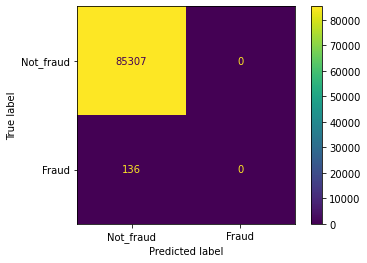

In [44]:
# Make a set of predictions for the test data
y_pred = svm_1.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy: " +  str(accuracy))

# auc scores
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score", auc_score)

# Classification table
print('%%%%%%% Classification Report %%%%%%%%%%%')
target_names = ['Not_fraud', 'Fraud']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

# Print confusion matrix
print('%%%%%%% Confusion Matrix %%%%%%%%%%%')
print(pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

# Print confusion matrix display
print('%%%%%%% Confusion Matrix Display%%%%%%%%%%%')
labels = ['Not_fraud', 'Fraud']
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

Naives Bayes

In [45]:
nb_model_1 = GaussianNB()
nb_model_1.fit(X_train, y_train)

GaussianNB()

Accuracy: 0.9930479969102208
AUC Score 0.82767042426006
%%%%%%% Classification Report %%%%%%%%%%%
              precision    recall  f1-score   support

   Not_fraud       1.00      0.99      1.00     85307
       Fraud       0.14      0.66      0.23       136

    accuracy                           0.99     85443
   macro avg       0.57      0.83      0.61     85443
weighted avg       1.00      0.99      1.00     85443

%%%%%%% Confusion Matrix %%%%%%%%%%%
Predicted      0    1    All
True                        
0          84759  548  85307
1             46   90    136
All        84805  638  85443
%%%%%%% Confusion Matrix Display%%%%%%%%%%%


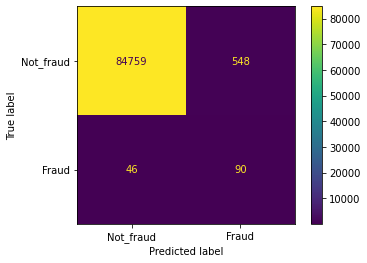

In [46]:
# Make a set of predictions for the test data
y_pred = nb_model_1.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy: " +  str(accuracy))

# auc scores
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score", auc_score)

# Classification table
print('%%%%%%% Classification Report %%%%%%%%%%%')
target_names = ['Not_fraud', 'Fraud']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

# Print confusion matrix
print('%%%%%%% Confusion Matrix %%%%%%%%%%%')
print(pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

# Print confusion matrix display
print('%%%%%%% Confusion Matrix Display%%%%%%%%%%%')
labels = ['Not_fraud', 'Fraud']
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

Random Forest

In [47]:
randomforest_1 = RandomForestClassifier()
randomforest_1.fit(X_train, y_train)

RandomForestClassifier()

Accuracy: 0.9996371850239341
AUC Score 0.904382458787259
%%%%%%% Classification Report %%%%%%%%%%%
              precision    recall  f1-score   support

   Not_fraud       1.00      1.00      1.00     85307
       Fraud       0.96      0.81      0.88       136

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443

%%%%%%% Confusion Matrix %%%%%%%%%%%
Predicted      0    1    All
True                        
0          85302    5  85307
1             26  110    136
All        85328  115  85443
%%%%%%% Confusion Matrix Display%%%%%%%%%%%


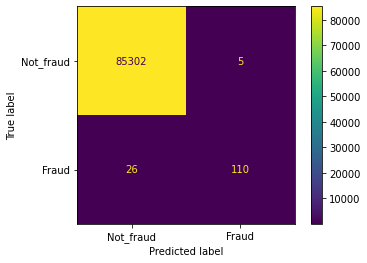

In [49]:
# Make a set of predictions for the test data
y_pred = randomforest_1.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy: " +  str(accuracy))

# auc scores
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score", auc_score)

# Classification table
print('%%%%%%% Classification Report %%%%%%%%%%%')
target_names = ['Not_fraud', 'Fraud']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

# Print confusion matrix
print('%%%%%%% Confusion Matrix %%%%%%%%%%%')
print(pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

# Print confusion matrix display
print('%%%%%%% Confusion Matrix Display%%%%%%%%%%%')
labels = ['Not_fraud', 'Fraud']
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

XGBoost

In [50]:
import xgboost
from xgboost import XGBClassifier

In [51]:
xgboost_1 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgboost_1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Accuracy: 0.9996722961506501
AUC Score 0.9190824799564756
%%%%%%% Classification Report %%%%%%%%%%%
              precision    recall  f1-score   support

   Not_fraud       1.00      1.00      1.00     85307
       Fraud       0.95      0.84      0.89       136

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.95     85443
weighted avg       1.00      1.00      1.00     85443

%%%%%%% Confusion Matrix %%%%%%%%%%%
Predicted      0    1    All
True                        
0          85301    6  85307
1             22  114    136
All        85323  120  85443
%%%%%%% Confusion Matrix Display%%%%%%%%%%%


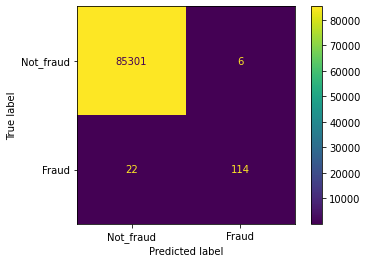

In [52]:
# Make a set of predictions for the test data
y_pred = xgboost_1.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy: " +  str(accuracy))

# auc scores
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score", auc_score)

# Classification table
print('%%%%%%% Classification Report %%%%%%%%%%%')
target_names = ['Not_fraud', 'Fraud']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

# Print confusion matrix
print('%%%%%%% Confusion Matrix %%%%%%%%%%%')
print(pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

# Print confusion matrix display
print('%%%%%%% Confusion Matrix Display%%%%%%%%%%%')
labels = ['Not_fraud', 'Fraud']
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

In [54]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import imblearn

## Dealing with the Imbalanced Data

In [55]:
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter # counter takes values returns value_counts dictionary

In [56]:
#oversampling using smote
print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_new, y_train_new = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_new))

Original dataset shape Counter({0: 199008, 1: 356})
Resampled dataset shape Counter({0: 199008, 1: 99504})


In [57]:
# undersampling

print('Original dataset shape after oversampling %s' % Counter(y_train_new))

under = RandomUnderSampler(random_state=42)
X_train_new, y_train_new = under.fit_resample(X_train_new, y_train_new)

print('Resampled dataset shape %s' % Counter(y_train_new))

Original dataset shape after oversampling Counter({0: 199008, 1: 99504})
Resampled dataset shape Counter({0: 99504, 1: 99504})


Random forest

In [58]:
randomforest_2 = RandomForestClassifier()
randomforest_2.fit(X_train_new, y_train_new)

RandomForestClassifier()

Accuracy: 0.9993562960102056
AUC Score 0.9372772750184627
%%%%%%% Classification Report %%%%%%%%%%%
              precision    recall  f1-score   support

   Not_fraud       1.00      1.00      1.00     85307
       Fraud       0.76      0.88      0.81       136

    accuracy                           1.00     85443
   macro avg       0.88      0.94      0.91     85443
weighted avg       1.00      1.00      1.00     85443

%%%%%%% Confusion Matrix %%%%%%%%%%%
Predicted      0    1    All
True                        
0          85269   38  85307
1             17  119    136
All        85286  157  85443
%%%%%%% Confusion Matrix Display%%%%%%%%%%%


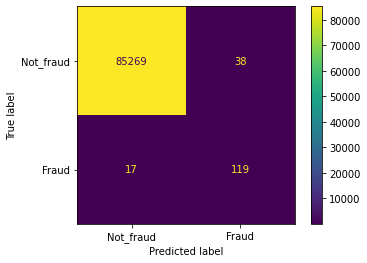

In [59]:
# Make a set of predictions for the test data
y_pred = randomforest_2.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy: " +  str(accuracy))

# auc scores
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score", auc_score)

# Classification table
print('%%%%%%% Classification Report %%%%%%%%%%%')
target_names = ['Not_fraud', 'Fraud']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

# Print confusion matrix
print('%%%%%%% Confusion Matrix %%%%%%%%%%%')
print(pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

# Print confusion matrix display
print('%%%%%%% Confusion Matrix Display%%%%%%%%%%%')
labels = ['Not_fraud', 'Fraud']
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

Xgboost

In [60]:
xgboost_2 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgboost_2.fit(X_train_new, y_train_new)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Accuracy: 0.9992392589211521
AUC Score 0.9408892725857266
%%%%%%% Classification Report %%%%%%%%%%%
              precision    recall  f1-score   support

   Not_fraud       1.00      1.00      1.00     85307
       Fraud       0.71      0.88      0.79       136

    accuracy                           1.00     85443
   macro avg       0.85      0.94      0.89     85443
weighted avg       1.00      1.00      1.00     85443

%%%%%%% Confusion Matrix %%%%%%%%%%%
Predicted      0    1    All
True                        
0          85258   49  85307
1             16  120    136
All        85274  169  85443
%%%%%%% Confusion Matrix Display%%%%%%%%%%%


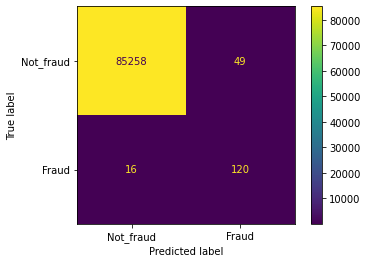

In [61]:
# Make a set of predictions for the test data
y_pred = xgboost_2.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy: " +  str(accuracy))

# auc scores
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score", auc_score)

# Classification table
print('%%%%%%% Classification Report %%%%%%%%%%%')
target_names = ['Not_fraud', 'Fraud']
print(metrics.classification_report(y_test, y_pred, target_names=target_names))

# Print confusion matrix
print('%%%%%%% Confusion Matrix %%%%%%%%%%%')
print(pd.crosstab(np.array(y_test), y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

# Print confusion matrix display
print('%%%%%%% Confusion Matrix Display%%%%%%%%%%%')
labels = ['Not_fraud', 'Fraud']
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

In [62]:
print(xgboost_2.feature_importances_)

[0.01090297 0.01581137 0.00625344 0.01757744 0.05977773 0.00728334
 0.00418447 0.00777005 0.01369155 0.0084296  0.01635964 0.00980944
 0.04068239 0.00615649 0.6755567  0.00913576 0.00848054 0.00993248
 0.00723839 0.00815377 0.00476388 0.00440127 0.00212525 0.00816112
 0.00404866 0.00777189 0.00840749 0.00346954 0.00581672 0.00784665]


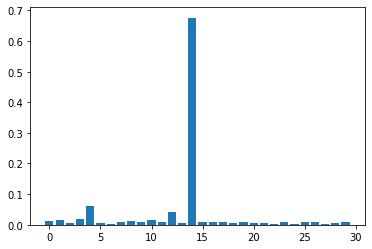

In [63]:

# plot
plt.bar(range(len(xgboost_2.feature_importances_)), xgboost_2.feature_importances_)
plt.show()

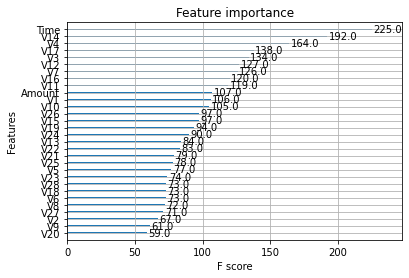

In [64]:
# plot feature importance
from xgboost import plot_importance
plot_importance(xgboost_2)
plt.show()

## Deployment 

After balancing the data and modelling for the task... we now deploy the model for the credit card prediction problem. 

In [65]:
import pickle

#Saving Models

xgboost

In [86]:
# save the model
model_name = 'xgboost.pkl'

pickle.dump(xgboost_2, open(model_name, "wb"))

In [87]:
# load the model
xg_model = pickle.load(open(model_name, "rb"))

Testing loaded Model

In [88]:
# Make a set of predictions for the test data
y_pred = xg_model.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy: " +  str(accuracy))

Accuracy: 0.9992392589211521


 Random Forest 

In [89]:
# save the model
model_name = 'randomforest.pkl'

pickle.dump(xgboost_2, open(model_name, "wb"))

In [90]:
# load the model
rf_model = pickle.load(open(model_name, "rb"))

Testing loaded Model

In [91]:
# Make a set of predictions for the test data
y_pred = rf_model.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy: " +  str(accuracy))

Accuracy: 0.9992392589211521
